In [1]:
# FASE 2: VISUALIZACIÓN
# Importo librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [62]:
# Hago la lectura de mi df limpio
df_canada = pd.read_csv("files/df_canada.csv")
df_canada.head()

,Unnamed: 0,ID_fidelidad,ano,mes,total_vuelos_mes,vuelos_con_acompañantes,total_vuelos,distancia_total_mes,puntos_acumulados_mes,puntos_canjeados,valor_puntos_canjeados_dollar,provincia,ciudad,codigo_postal,genero,estudios,salario,estado_civil,tarjeta_fidelidad,valor_total_cliente,inscripcion,alta_año,alta_mes,baja_año,baja_mes
0,0,100018,2017,1,3,0,3,1521,152,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.2,Standard,2016,8,0,0
1,1,100018,2017,2,2,2,4,1320,132,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.2,Standard,2016,8,0,0
2,2,100018,2018,10,6,4,10,3110,311,385,31,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.2,Standard,2016,8,0,0
3,3,100018,2017,4,4,0,4,924,92,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.2,Standard,2016,8,0,0
4,4,100018,2017,5,0,0,0,0,0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552,Married,Aurora,7919.2,Standard,2016,8,0,0


In [63]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
# Primero voy a agrupar los datos en varios data frames según el año y los vuelos para después hacer las visualizaciones.
df_canada["ano"].value_counts() # compruebo que hay datos de 2 años: 2017 y 2018
# Hago primero un df del 2017
ano_2017 = df_canada["ano"]== 2017
df_ano_2017 = df_canada.groupby(["mes", ano_2017]) ["total_vuelos_mes"].sum().reset_index()
df_ano_2017

,mes,ano,total_vuelos_mes
0,1,False,49170
1,1,True,47766
2,2,False,48643
3,2,True,47691
4,3,False,66928
5,3,True,64271
6,4,False,56791
7,4,True,55720
8,5,False,76891
9,5,True,65279


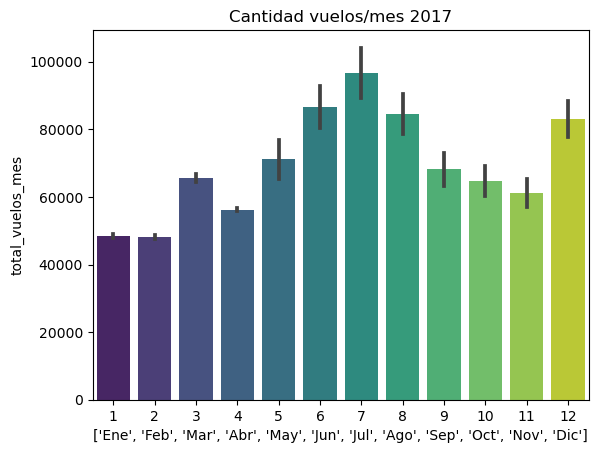

In [64]:
# Hago la visualización del 2017
sns.barplot(data = df_ano_2017,
            x= "mes",
            y = "total_vuelos_mes",
            palette= "viridis")
plt.xlabel(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul","Ago","Sep", "Oct", "Nov", "Dic"])
plt.title("Cantidad vuelos/mes 2017");

In [65]:
# Repito el proceso para el 2018
ano_2018 = df_canada["ano"]== 2018
df_ano_2018 = df_canada.groupby(["mes", ano_2018]) ["total_vuelos_mes"].sum().reset_index()
df_ano_2018

,mes,ano,total_vuelos_mes
0,1,False,47766
1,1,True,49170
2,2,False,47691
3,2,True,48643
4,3,False,64271
5,3,True,66928
6,4,False,55720
7,4,True,56791
8,5,False,65279
9,5,True,76891


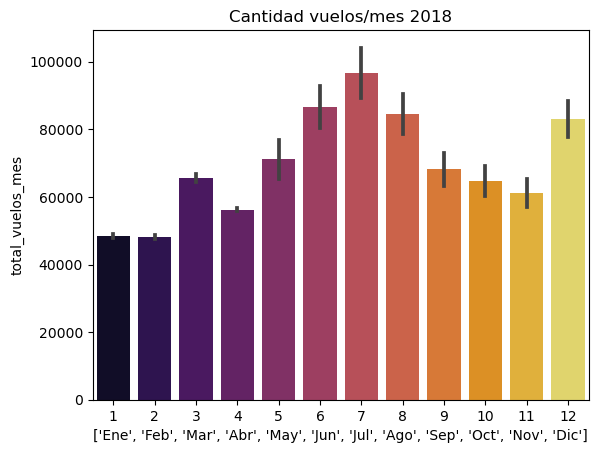

In [66]:
# Hago la visualización del 2018
sns.barplot(data = df_ano_2018,
            x= "mes",
            y = "total_vuelos_mes",
            palette= "inferno")
plt.xlabel(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul","Ago","Sep", "Oct", "Nov", "Dic"])
plt.title("Cantidad vuelos/mes 2018");

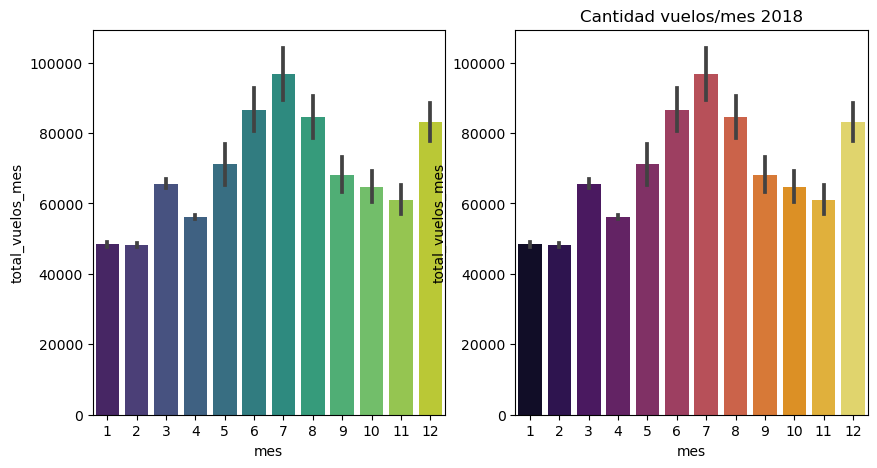

In [67]:
# Paso a hacer la visualización de ambos
fig,axes= plt.subplots (nrows=1, ncols= 2, figsize = (10,5))
sns.barplot(data = df_ano_2017,
            x= "mes",
            y = "total_vuelos_mes",
            palette= "viridis",
            ax= axes[0])
plt.xlabel(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul","Ago","Sep", "Oct", "Nov", "Dic"])
plt.title("Cantidad vuelos/mes 2017");

sns.barplot(data = df_ano_2018,
            x= "mes",
            y = "total_vuelos_mes",
            palette= "inferno",
            ax= axes[1])
plt.title("Cantidad vuelos/mes 2018");
# No se observan grandes diferencias respecto a los años. 
# Podemos observar que los meses donde se concentran más vuelos en la estación de verano sobre todo julio, junio y agosto así como en diciembre coincidiendo con las navidades/vacaciones de invierno
# Otro salto importante es en marzo, que serán las vacaciones de pascua/semana santa.
# Los meses en los que menos se concentran los vuelos son enero y febrero.


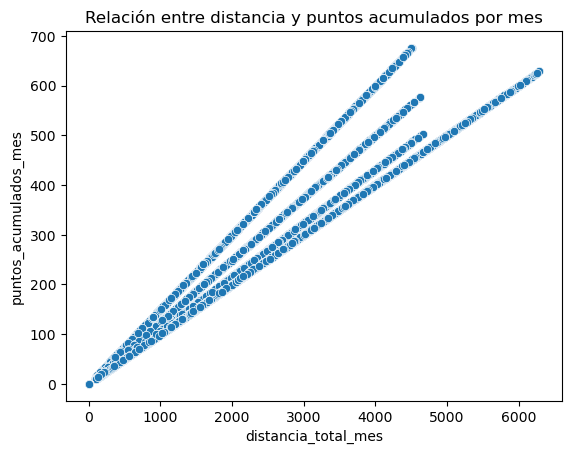

In [68]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
# Vamos a comprobarlo con un gráfico de regresión
sns.scatterplot(data= df_canada,
                x = "distancia_total_mes",
                y = "puntos_acumulados_mes",
                markers = "*")
plt.title("Relación entre distancia y puntos acumulados por mes", fontsize = 12);
# Se puede observar una clara correlación emntre la distancia recorrida y los puntos acumulados. 
# Es posible que la variación entre la distancia y los puntos pueda tener en cuenta otros factores como podría ser el lugar al que vuela, inscripción o tarjeta de fidelidad del cliente.

In [69]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?
# Veamos la distribución de clientes por provincia
sns.barplot(data = df_canada,
            x = "provincia",
            palette= "inferno")
plt.title("Distribución de clientes por provincia");


TypeError: Horizontal orientation requires numeric `x` variable.

In [70]:
sns.violinplot (data = df_canada,
                x = "provincia",
                bins=10,
                kde = False, 
                palette= "inferno");

TypeError: Horizontal orientation requires numeric `x` variable.

TypeError: cannot unpack non-iterable int object

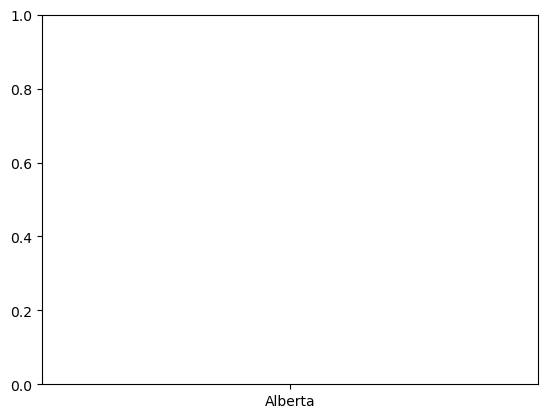

In [71]:
plt.hist(data= df_canada,
            x= "provincia",
            bins = 10,
            range= 100);